In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import powerlaw


In [ ]:
social_network = nx.read_edgelist('facebook_combined.txt')

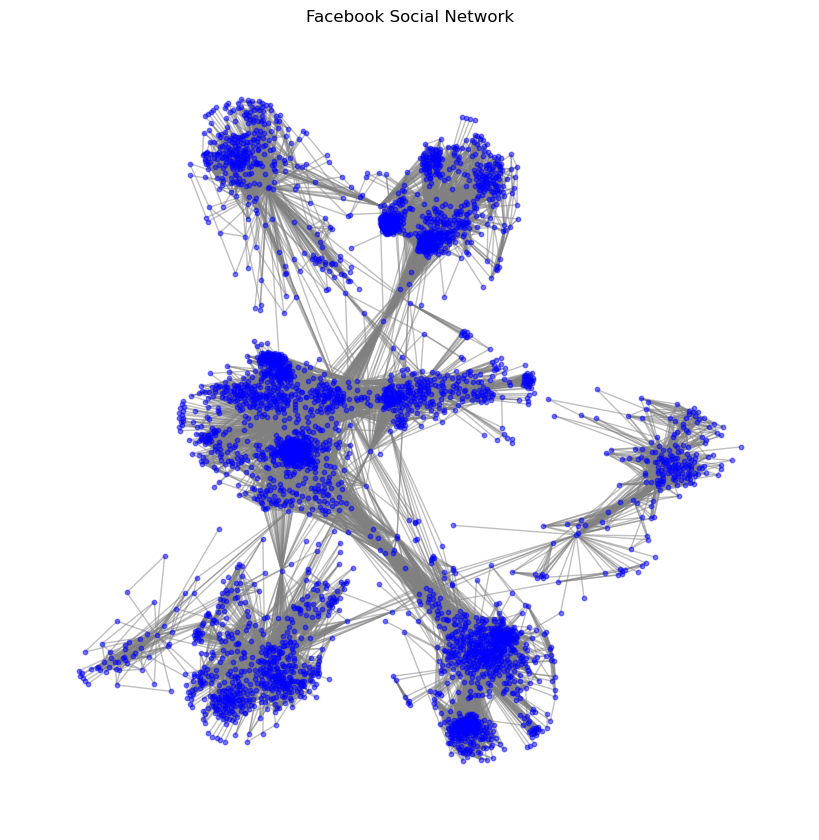

In [4]:
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(social_network, seed=25 , k=0.06)
nx.draw(social_network, pos, with_labels=False, node_size=10, node_color='blue', edge_color='gray', alpha=0.5)
plt.title("Facebook Social Network")
plt.show()

In [ ]:
degrees = [social_network.degree(n) for n in social_network.nodes()]

plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=np.arange(0, max(degrees)+1) - 0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=np.logspace(0, np.log10(max(degrees)), 30), edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution (Logarithmic)')
plt.show()

In [ ]:
clustering_coefficients = nx.clustering(social_network)
average_clustering_coefficient = np.mean(list(clustering_coefficients.values()))
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.4f}")


In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(clustering_coefficients.values(), bins=np.linspace(0, 1, 20), edgecolor='black')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')
plt.show()

In [ ]:
eigen_centrality = nx.eigenvector_centrality(social_network)
print("Eigenvalue Centrality:")
print(eigen_centrality)

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(eigen_centrality.keys(), eigen_centrality.values())
plt.xlabel('Node')
plt.ylabel('Eigenvalue Centrality')
plt.title('Eigenvalue Centrality')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
nodes = nx.draw_networkx_nodes(social_network, pos, node_size=50, cmap=plt.cm.viridis, node_color=list(eigen_centrality.values()))
nx.draw_networkx_edges(social_network, pos, alpha=0.5)
nx.draw_networkx_labels(social_network, pos, font_size=8)
plt.colorbar(nodes)
plt.title("Facebook Network with Eigenvector Centrality Coloring")
plt.show()

In [8]:
closeness_centrality = nx.closeness_centrality(social_network)
print("Closeness Centrality:")
print(closeness_centrality)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(closeness_centrality.keys(), closeness_centrality.values())
plt.xlabel('Node')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality')
plt.show()

In [7]:
betweenness_centrality = nx.betweenness_centrality(social_network)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)

KeyboardInterrupt: 

In [ ]:
display(betweenness_centrality)

top100_bwcs = pd.DataFrame(sorted_betweenness[:100], columns=['Node', 'Betweenness Centrality'])

display(top100_bwcs)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(betweenness_centrality.keys(), betweenness_centrality.values())
plt.xlabel('Node')
plt.xticks([], [])
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
centrality_measures = {
    'Degree Centrality': nx.degree_centrality(social_network),
    'Closeness Centrality': nx.closeness_centrality(social_network),
    'Betweenness Centrality': nx.betweenness_centrality(social_network),
}

for measure_name, measure in centrality_measures.items():
    x, y = zip(*sorted(measure.items()))
    plt.plot(x, y, marker='o', linestyle='-', label=measure_name)

plt.xlabel('Node')
plt.ylabel('Centrality Measure')
plt.title('Centrality Measures Comparison')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
node_colors = list(eigen_centrality.values())
nodes = nx.draw_networkx_nodes(social_network, pos, node_size=10, cmap=plt.cm.viridis,
                               node_color=node_colors, nodelist=list(eigen_centrality.keys()), alpha=0.4)
nx.draw_networkx_edges(social_network, pos, alpha=0.1)
plt.colorbar(nodes, label='Eigenvalue Centrality')
plt.title("Network Graph with Eigenvalue Centrality Clustering")
plt.show()

In [5]:
plt.figure(figsize=(8, 8))
node_colors = list(betweenness_centrality.values())
nodes = nx.draw_networkx_nodes(social_network, pos, node_size=10, cmap=plt.cm.viridis,
                               node_color=node_colors, nodelist=list(betweenness_centrality.keys()))
nx.draw_networkx_edges(social_network, pos, alpha=0.1)
plt.colorbar(nodes, label='Betweenness Centrality')
plt.title("Network Graph with Betweenness Centrality Clustering")
plt.show()

NameError: name 'betweenness_centrality' is not defined

<Figure size 800x800 with 0 Axes>

In [45]:
def display_network(G, pos, seed_nodes, activated_nodes, activated_next, step, model_name):
    plt.figure(figsize=(8, 6))
    inactive_nodes = set(G.nodes()) - activated_nodes
    activated_nodes_only = activated_nodes - set(seed_nodes)
    
    inactive_nodes = set(G.nodes()) - activated_nodes
    nx.draw_networkx_nodes(G, pos, nodelist=inactive_nodes, node_color='gray', node_size=10, alpha=0.5)

    # Plot seed nodes (blue)
    nx.draw_networkx_nodes(G, pos, nodelist=seed_nodes, node_color='blue', node_size=10)

    # Plot activated nodes (red)
    activated_nodes_only = activated_nodes - set(seed_nodes)
    nx.draw_networkx_nodes(G, pos, nodelist=activated_nodes_only, node_color='red', node_size=10, alpha=0.6)

    # Plot edges
    nx.draw_networkx_edges(G, pos, alpha=0.3)


    
    plt.title(f'{model_name} Model Simulation - Step {step}')
    plt.show()

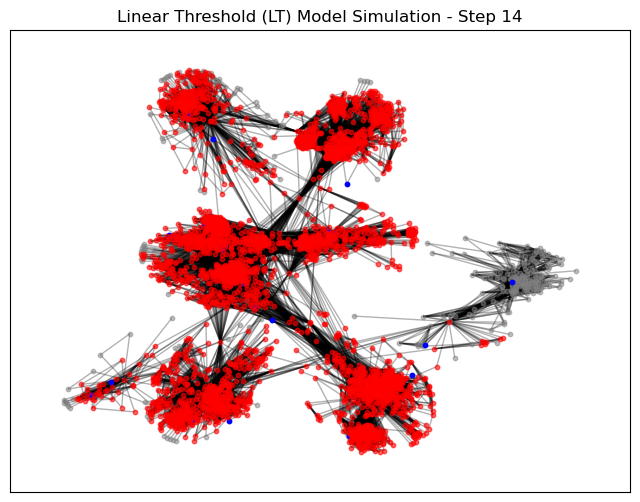

activated 241
activated 255


In [46]:

from IPython.display import clear_output

plt.ion()
thresholds = {node: np.random.rand() for node in social_network.nodes()}

# select seed nodes randomly
seed_nodes = np.random.choice(social_network.nodes(), 40, replace=False)

activated_nodes = set(seed_nodes)
activated_next = set(seed_nodes)
already_attempted = set()

step = 0
while activated_next:
    clear_output(wait=True)
    display_network(social_network, pos, seed_nodes, activated_nodes, activated_next, step, "Linear Threshold (LT)")
    
    newly_activated = []
    for node in activated_next:
        if node not in already_attempted:
            neighbors = set(social_network.neighbors(node))
            active_neighbors = neighbors.intersection(activated_nodes)
            influence = len(active_neighbors) / len(neighbors)
            if influence * 4 > thresholds[node]:
                newly_activated.extend(neighbors - activated_nodes)
            already_attempted.add(node)
    
    activated_nodes.update(newly_activated)
    activated_next = set(newly_activated)
    
    step += 1

    
    


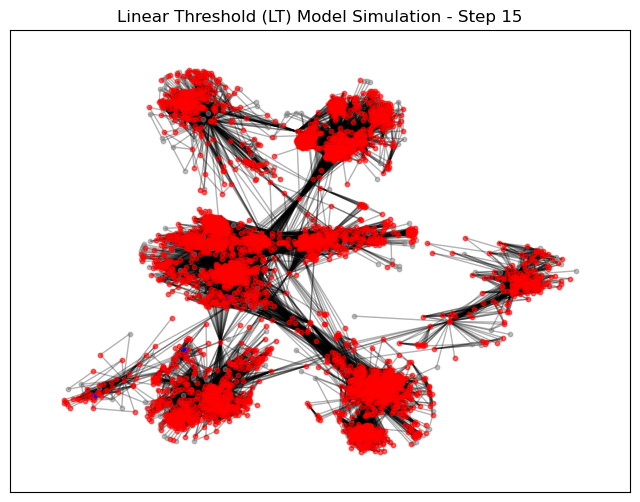

In [48]:

from IPython.display import clear_output

plt.ion()
probabilities = {(u, v): np.random.rand() for (u, v) in social_network.edges()}

# Select two seed nodes randomly
seed_nodes = np.random.choice(social_network.nodes(), 10, replace=False)

# Perform IC model simulation step by step
activated_nodes = set(seed_nodes)
activated_next = set(seed_nodes)
activation_steps = [set(seed_nodes)]
already_attempted = set()


step = 0
while activated_next:
    clear_output(wait=True)
    display_network(social_network, pos, seed_nodes, activated_nodes, activated_next, step, "Independent Cascade (IC)")
    newly_activated = []
    for node in activated_next:
        for neighbor in social_network.neighbors(node):
            if neighbor not in activated_nodes:
                if np.random.rand() < probabilities.get((node, neighbor), 0.05):  # probability of node succeeding in its try to activate its neighbour
                    newly_activated.append(neighbor)
          
    step += 1
    already_attempted.add(node)
    activated_nodes.update(newly_activated)
    activated_next = set(newly_activated)
    activation_steps.append(set(activated_nodes))